Stock Market Prediction Using LSTM

In [3]:
## Data Collection
import pandas_datareader as pdr
import pandas as pd

In [4]:
df = pdr.DataReader('AAPL', data_source='yahoo', start='2010-03-03', end='2020-07-13')

In [5]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-03-02,30.118572,29.677143,29.990000,29.835714,141636600.0,25.828703
2010-03-03,29.981428,29.705715,29.848572,29.904285,93013200.0,25.888062
2010-03-04,30.131428,29.804285,29.897142,30.101429,91510300.0,26.058725
2010-03-05,31.385714,30.661428,30.705715,31.278572,224905100.0,27.077780
2010-03-08,31.441429,31.178572,31.430000,31.297142,107472400.0,27.093855
...,...,...,...,...,...,...
2020-07-07,378.619995,372.230011,375.410004,372.690002,28106100.0,372.690002
2020-07-08,381.500000,376.359985,376.720001,381.369995,29273000.0,381.369995
2020-07-09,385.269989,378.690002,385.049988,383.010010,31410700.0,383.010010


In [68]:
## Create new dataframe with only 'Close' coloumns
df1 = df.filter(['Close'])

In [69]:
df1

,Close
Date,
2010-03-02,29.835714
2010-03-03,29.904285
2010-03-04,30.101429
2010-03-05,31.278572
2010-03-08,31.297142
...,...
2020-07-07,372.690002
2020-07-08,381.369995
2020-07-09,383.010010


In [79]:
print(df1[1697:])

                 Close
Date                  
2016-11-23  111.230003
2016-11-25  111.790001
2016-11-28  111.570000
2016-11-29  111.459999
2016-11-30  110.519997
...                ...
2020-07-07  372.690002
2020-07-08  381.369995
2020-07-09  383.010010
2020-07-10  383.679993
2020-07-13  381.910004

[913 rows x 1 columns]


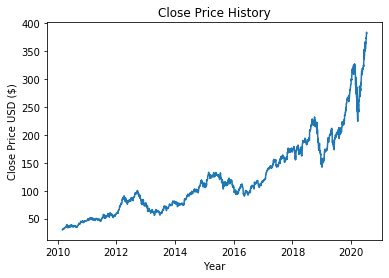

In [56]:
import matplotlib.pyplot as plt
plt.title('Close Price History')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Close Price USD ($)', fontsize=10)
plt.plot(df1)

In [9]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [10]:
import numpy as np

In [57]:
df1

,Close
Date,
2010-03-02,29.835714
2010-03-03,29.904285
2010-03-04,30.101429
2010-03-05,31.278572
2010-03-08,31.297142
...,...
2020-07-07,372.690002
2020-07-08,381.369995
2020-07-09,383.010010


In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [60]:
print(df1)

[[0.00000000e+00]
 [1.93788892e-04]
 [7.50936674e-04]
 ...
 [9.98106560e-01]
 [1.00000000e+00]
 [9.94997831e-01]]


In [61]:
##splitting dataset into training and testing split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [62]:
training_size,test_size

(1696, 914)

In [63]:
train_data

array([[0.00000000e+00],
       [1.93788892e-04],
       [7.50936674e-04],
       ...,
       [2.26411129e-01],
       [2.26722002e-01],
       [2.31441609e-01]])

In [15]:
## Convert an array of values in dataset matrix
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(1595, 100)
(1595,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(813, 100)
(813,)


(None, None)

In [19]:
# Reshaping input to [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

C:\Users\SOHAN\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SOHAN\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SOHAN\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SOHAN\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 1595 samples, validate on 813 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
1595/1595 [==============================] - 19s 12ms/sample - loss: 0.0060 - val_loss: 0.0164
Epoch 2/100
1595/1595 [==============================] - 10s 6ms/sample - loss: 4.9232e-04 - val_loss: 0.0018
Epoch 3/100
1595/1595 [==============================] - 9s 6ms/sample - loss: 1.4328e-04 - val_loss: 0.0018
Epoch 4/100
1595/1595 [==============================] - 9s 6ms/sample - loss: 1.2752e-04 - val_loss: 0.0014
Epoch 5/100
1595/1595 [==============================] - 9s 6ms/sample - loss: 1.1676e-04 - val_loss: 0.0018
Epoch 6/100
1595/1595 [==============================] - 10s 6ms/sample - loss: 1.1525e-04 - val_loss: 0.0017
Epoch 7/100
1595/1595 [==============================] - 9s 6ms/sample - loss: 1.1305e-04 - val_loss: 0.0022
Epoch 8/100
1595/1595 [==============================] - 9s 6ms/sample - loss: 1.1009e-04 - val_

In [24]:
import tensorflow as tf

In [25]:
## Calculate the prediction and check the performance
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [26]:
## Revert back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
## Calculating RMSE 
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

87.16809693512602

In [28]:
## Caluclate Test data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

208.362328003042

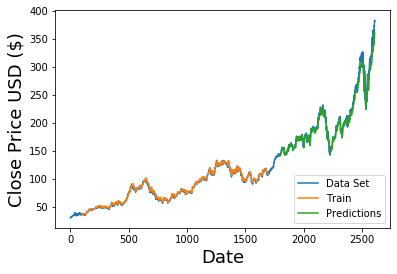

In [29]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Data Set', 'Train', 'Predictions'], loc='lower right')
plt.show()

In [78]:
test_predict

array([[141.15837],
       [141.036  ],
       [141.2622 ],
       [141.71059],
       [142.44588],
       [143.40956],
       [144.18507],
       [144.6285 ],
       [144.71625],
       [145.073  ],
       [145.83078],
       [146.65044],
       [147.1839 ],
       [147.79466],
       [149.15462],
       [151.07321],
       [152.82486],
       [154.1135 ],
       [155.19518],
       [155.91588],
       [156.18686],
       [155.11237],
       [153.6081 ],
       [152.38152],
       [151.88089],
       [151.9981 ],
       [152.39046],
       [152.92722],
       [153.39836],
       [153.72429],
       [153.72142],
       [153.55331],
       [153.76488],
       [154.00804],
       [154.24745],
       [154.59534],
       [154.89653],
       [153.95778],
       [151.49745],
       [148.67607],
       [146.12395],
       [144.19115],
       [142.72072],
       [142.52142],
       [143.12302],
       [144.2137 ],
       [145.33122],
       [146.29953],
       [146.88336],
       [146.68573],


In [40]:
len(test_data)

914

In [41]:
x_input=test_data[814:].reshape(1,-1)
x_input.shape

(1, 100)

In [42]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [43]:
temp_input

[0.8208816455053556,
 0.8003924064703121,
 0.7583682844832795,
 0.7298246376818547,
 0.7427399442277605,
 0.6886766003952784,
 0.6882244137360451,
 0.7601487425022022,
 0.733329062729466,
 0.771255302411175,
 0.7435030469477484,
 0.732509469019244,
 0.6679048201632773,
 0.722081145976228,
 0.6940744654422808,
 0.6172045014112479,
 0.701252788508206,
 0.6001913988058052,
 0.6302893671736429,
 0.6127957892909566,
 0.6074544583570818,
 0.5635368532477649,
 0.5497737074965199,
 0.613389289671562,
 0.6095457893138656,
 0.6460590211505339,
 0.6158197390613243,
 0.6358002573240069,
 0.6343306722429454,
 0.5965174576645982,
 0.6078783563983046,
 0.5979305086325322,
 0.6574482085022508,
 0.6488568344683916,
 0.6676221927205332,
 0.6730482601397594,
 0.6879135839210773,
 0.7269137561377421,
 0.7195093828650936,
 0.7258964008388071,
 0.7149028229103027,
 0.698313618346083,
 0.6741221926747152,
 0.6959679916874586,
 0.6929440419170909,
 0.7153832981875463,
 0.7159485530730347,
 0.7029766692911079,

In [44]:
## Prediction for the next 100 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<100):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.0287503]
101
1 day input [0.80039241 0.75836828 0.72982464 0.74273994 0.6886766  0.68822441
 0.76014874 0.73332906 0.7712553  0.74350305 0.73250947 0.66790482
 0.72208115 0.69407447 0.6172045  0.70125279 0.6001914  0.63028937
 0.61279579 0.60745446 0.56353685 0.54977371 0.61338929 0.60954579
 0.64605902 0.61581974 0.63580026 0.63433067 0.59651746 0.60787836
 0.59793051 0.65744821 0.64885683 0.66762219 0.67304826 0.68791358
 0.72691376 0.71950938 0.7258964  0.71490282 0.69831362 0.67412219
 0.69596799 0.69294404 0.7153833  0.71594855 0.70297667 0.72883557
 0.74598994 0.73262254 0.74418128 0.75661612 0.76529227 0.7740814
 0.79214024 0.80593163 0.79575764 0.78513147 0.79047285 0.78530103
 0.80579027 0.80064683 0.81785778 0.81113165 0.81689692 0.81079253
 0.81469248 0.81508817 0.81421209 0.82526216 0.82947302 0.83450348
 0.82659043 0.85253402 0.85807316 0.88783201 0.91284303 0.86496885
 0.87316453 0.88500591 0.91069516 0.9093104  0.90970609 0.9040256
 0.92988442 0.95153237 0.93324749 0.

In [45]:
day_new=np.arange(1,101)
day_pred=np.arange(101,201)

In [46]:
import matplotlib.pyplot as plt

In [47]:
len(df1)

2610

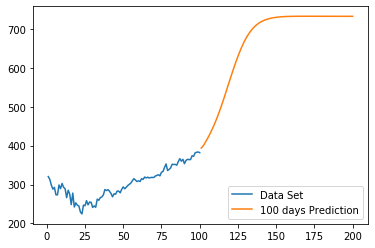

In [51]:
plt.plot(day_new,scaler.inverse_transform(df1[2510:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.legend(['Data Set','100 days Prediction'], loc='lower right')